## Building a GPT

Loosely derived from Karpathy's [Zero To Hero](https://karpathy.ai/zero-to-hero.html) video on GPT. Significant changes for my understanding (kma@pebblebed.com)

In [2]:
# %pip install datasets transformers zstandard matplotlib
import torch
import text_data
import conv_text
import numpy as np
import pandas as pd


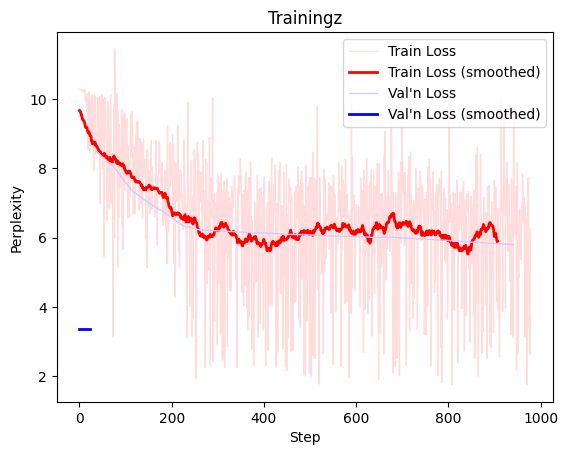

In [37]:
tdat = pd.read_csv('lightning_logs/version_10/metrics.csv')
train = tdat.train_loss[~np.isnan(tdat.train_loss)]
if True:
    import matplotlib.pyplot as plt

    xspace = np.linspace(0, len(train), len(train))
    fsz = max(20, len(train)//20)
    filter = np.ones(fsz)/fsz
    # filter =  np.linspace(0.25, 1.75, num=fsz)/fsz

    plt.plot( train, label = 'Train Loss', color='#fdd', linewidth=1)
    plt.plot( np.convolve(train, filter, mode='valid'), label = 'Train Loss (smoothed)', color='r', linewidth=2)
    if 'val_loss' in tdat.columns:
        val = tdat.val_loss[~np.isnan(tdat.val_loss)]
        plt.plot( val, label = 'Val\'n Loss', color='#ccf', linewidth=1)
        plt.plot( np.convolve(val, filter, mode='valid'), label = 'Val\'n Loss (smoothed)', color='b', linewidth=2)

    plt.xlabel('Step')
    plt.ylabel('Perplexity')
    plt.legend(loc='upper right')
    plt.title('Trainingz')
    plt.show()


In [38]:
np.mean(tdat.train_loss[-100:])


5.9570256860888735

In [39]:
tdat.val_loss[~np.isnan(tdat.val_loss)]

36     8.489210
74     8.052066
112    7.382239
149    7.011292
187    6.706721
225    6.345293
262    6.220405
300    6.197508
338    6.172860
376    6.140779
413    6.132964
451    6.096307
489    6.088423
526    6.059505
564    6.045053
602    6.037290
639    6.006948
677    6.014541
715    5.982567
753    5.956551
791    5.929102
828    5.893945
866    5.859547
904    5.832836
941    5.802875
Name: val_loss, dtype: float64